In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (15,10)

# Section 1.1

In [3]:
## Integrating the standard normal distribution
result = stats.norm.cdf(1)
print(result)
result2 = stats.norm.cdf(2)
print(result2)
result3 = stats.norm.cdf(5)
print(result3)

0.8413447460685429
0.9772498680518208
0.9999997133484281


The above sigmas and the result values perfectly match the values on the z-table

In [4]:
result = stats.norm.ppf(.84134)
print(result)
result2 = stats.norm.ppf(.97724968)
print(result2)
result3 = stats.norm.ppf(.999999713)
print(result3)

0.9999803859660787
1.9999965169883418
4.9997657768508095


By comparing 3 results, I get 1, 2, 5, which are the same from the integration of the normal distribution. (There is no minus sign appearing)

# Section 1.2

In [5]:
d = stats.expon.rvs(loc = 0, scale = 3, size = 100000)
e = stats.expon.rvs(loc = 0, scale = 1, size = 100000)

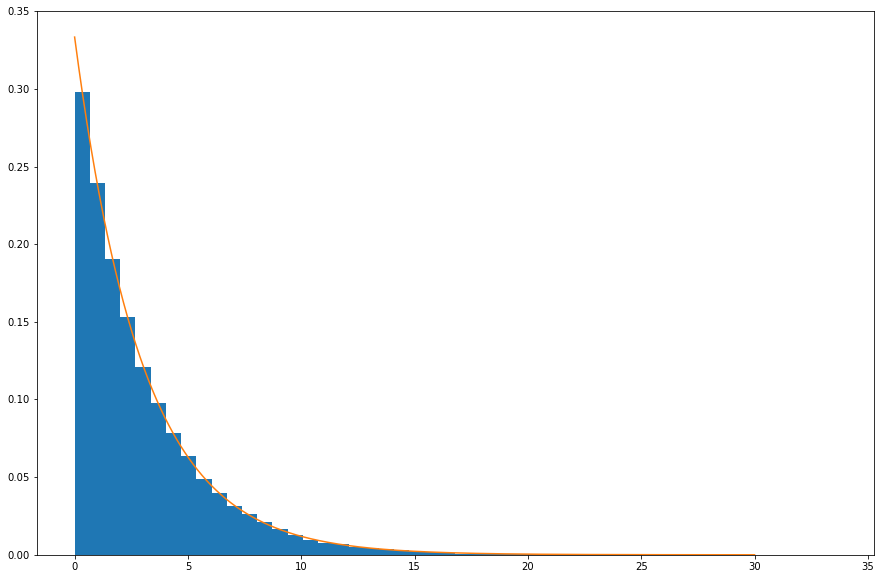

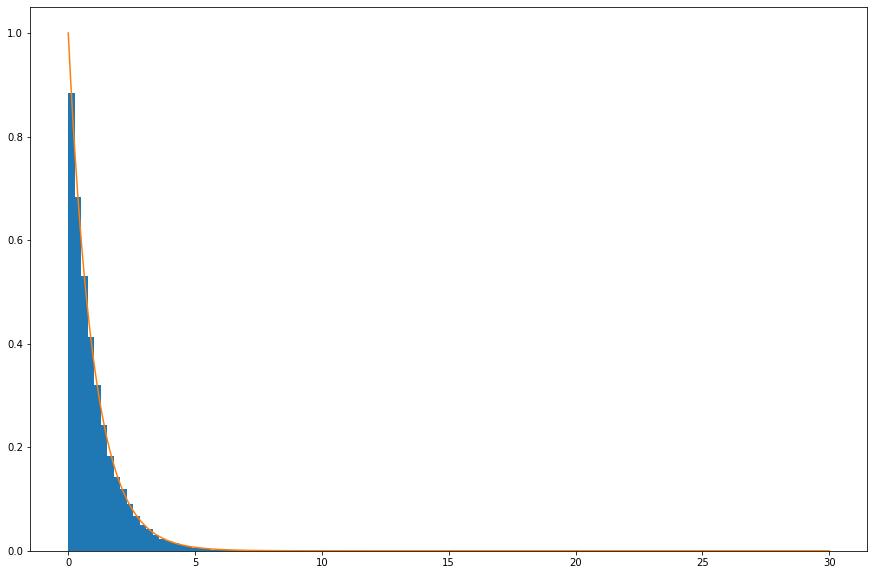

In [6]:
x = np.linspace(0,30,1000);
fig, ax = plt.subplots()
ax.hist(d,50, density = True)
ax.plot(x, stats.expon.pdf(x, loc = 0, scale = 3))
fig, ax = plt.subplots()
ax.hist(e,50, density = True)
ax.plot(x, stats.expon.pdf(x, loc = 0, scale = 1))

This is exponential distribution as it is decreasing exponentially. Here, scale refers to scale = 1 / lambda. Therefore, as the scale decreases, the lambda increases, causing the distribution to have
greater slope as you can see from the second graph (scale of 1). You can see the exponential graph approaching x = 5 at a faster rate.

# Section 1.3

__A:__ Hypothetical Measurement = 3
<br>
__B:__ What is the probability that the data produces a signal that is equally or more signal-like than the measured value of 3?
<br>
__C:__ X*sigma = Integral x-> inf (lambda * exp(-lambda * x)) 

In [7]:
## D
probability = stats.expon.cdf(3)
print(probability)

## E
sigma = stats.expon.ppf(probability)
print(sigma)

0.950212931632136
3.0


# Section 1.4

In [8]:
## 1st: Measured Value = 5
probability = stats.expon.cdf(5)
print('1st')
print(probability)
sigma = stats.expon.ppf(probability)
print(sigma)
print()

## 2nd: Measured Value = 7
print('2nd')
probability = stats.expon.cdf(7)
print(probability)
sigma = stats.expon.ppf(probability)
print(sigma)
print()

## 3rd: Measured Value = 9
print('3rd')
probability = stats.expon.cdf(9)
print(probability)
sigma = stats.expon.ppf(probability)
print(sigma)
print()

1st
0.9932620530009145
4.999999999999999

2nd
0.9990881180344455
7.000000000000047

3rd
0.9998765901959134
9.000000000000245



From my observation, as the measured value goes up, the probability increases, approaching 1. Therefore, the measured value is proportional to the probability.

# Section 2

# Poisson 

# 2.A

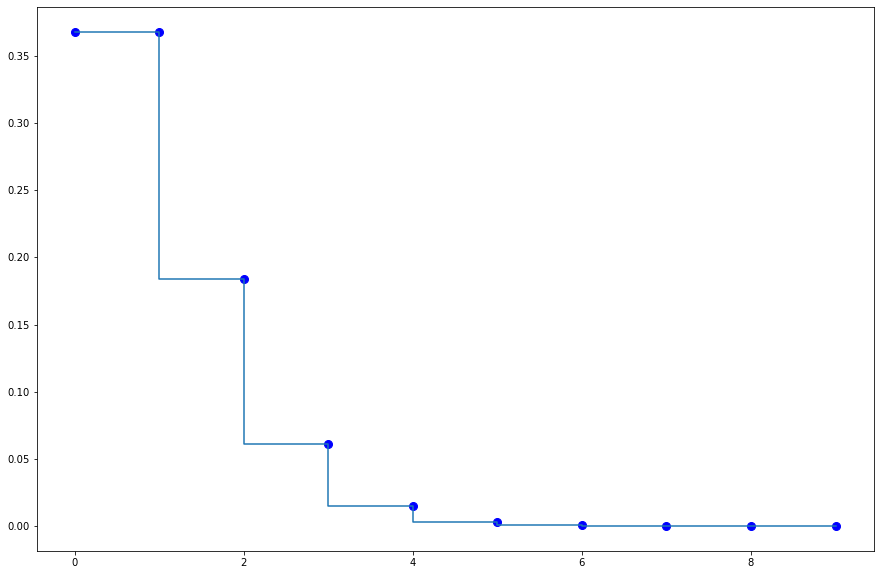

In [9]:
mu = 1
mean, var, skew, kurt = stats.poisson.stats(mu, moments = 'mvsk')
y = np.arange(0, 10)
fig, ax = plt.subplots()
ax.plot(y, stats.poisson.pmf(y, mu), 'bo', ms = 8, label = 'poisson pmf')
ax.step(y, stats.poisson.pmf(y, mu))

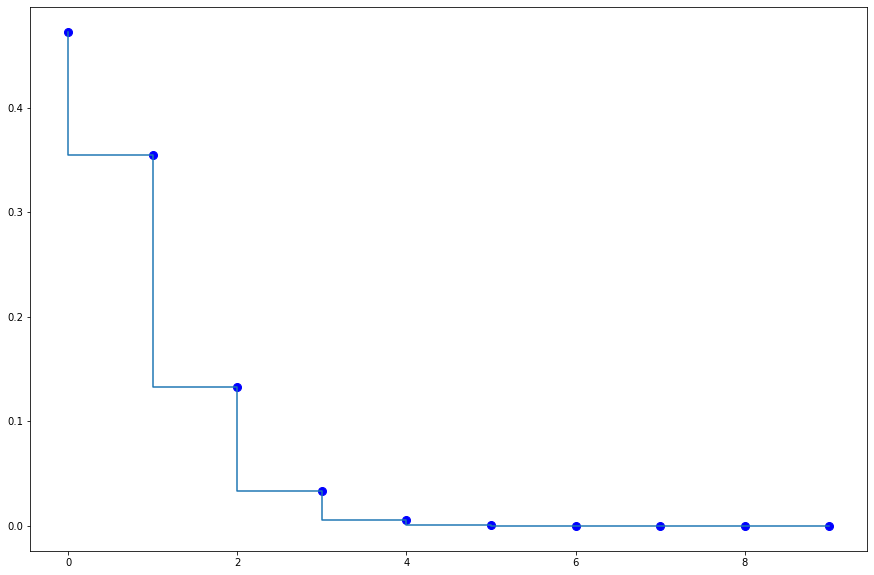

In [10]:
mu = 0.75
mean, var, skew, kurt = stats.poisson.stats(mu, moments = 'mvsk')
y = np.arange(0, 10)
fig, ax = plt.subplots()
ax.plot(y, stats.poisson.pmf(y, mu), 'bo', ms = 8, label = 'poisson pmf')
ax.step(y, stats.poisson.pmf(y, mu))

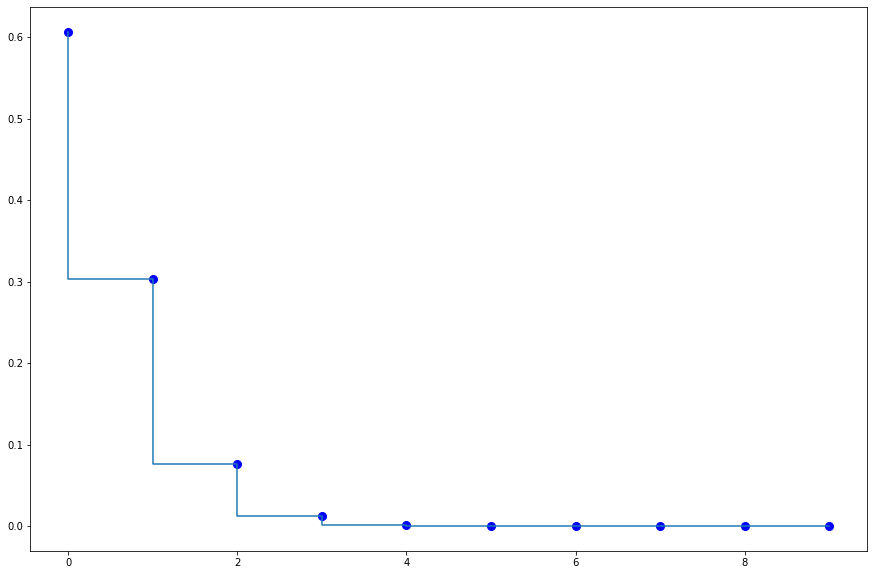

In [11]:
mu = 0.5
mean, var, skew, kurt = stats.poisson.stats(mu, moments = 'mvsk')
y = np.arange(0, 10)
fig, ax = plt.subplots()
ax.plot(y, stats.poisson.pmf(y, mu), 'bo', ms = 8, label = 'poisson pmf')
ax.step(y, stats.poisson.pmf(y, mu))

# 2.B
A poisson distribution measures how many times an event is likely to occur during an interval. As the plots shown, the probability decreases rapidly as the number of events increases and soon reaches zero. Also, the probability of 0 event is the highest, which means it is the most common. From the above graphs, I decrease mu (lambda) from 1 to 0.75 to 0.5. The trend is that at x = 0, the probability increases as the mu decreases, but the rate of change also increases. In other words, as mu decreases, the faster it is to approach 0 probability.

# 2.C

What is the probability that the data produces a signal that is equally or more signal-like than the given number of events (9 events)?

In [14]:
probability = stats.poisson.pmf(9, 1)
print(probability)
sigma = stats.poisson.cdf(probability, 1)
print(sigma)

1.013777119630298e-06
0.36787944117144245


# 2.D

Discrete distributions lead to discrete probabilities and 'sigmas." It implies that the time between two events has no effect on the time between other two events.

# 2.E

It makes sense since the average number of events is not an integer due to the weight of different events and that results corresponds to their probabilities. Therefore, the parameters of the distribution aren't discrete since each event can have different weight.